In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lets_plot import *
import statsmodels.api as sm
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score
from sklearn.metrics.cluster import adjusted_rand_score

In [43]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [44]:
# Required to use lets_plot
import numpy as np
from lets_plot import *
LetsPlot.setup_html()        

np.random.seed(12)
data = dict(
    cond=np.repeat(['A','B'], 200),
    rating=np.concatenate((np.random.normal(0, 1, 200), np.random.normal(1, 1.5, 200)))
)

ggplot(data, aes(x='rating', fill='cond')) + ggsize(500, 250) \
+ geom_density(color='dark_green', alpha=.7) + scale_fill_brewer(type='seq') \
+ theme(axis_line_y='blank')

In [159]:
# Loading datasets 
path1 = "data/gearbox_data.csv"
path2 = "data/gearbox_data_D1_D2.csv"
path3 = "data/new data.csv"
path4 = "data/new_data_D1_D2.csv"
path5 = "data/both_gearbox_data_D1_D2.csv"

dataset = path4
# for path 3 and path 4 look at 6 clusters and 4 cluster wcabr 
# because no screws
dataframe = pd.read_csv(dataset, encoding="latin_1")
df = dataframe

In [122]:
# Display first 3 rows
df.head(3)

,part,class,polygons,vertices,x,y,z,com_x,com_y,com_z,...,91.1,92.1,93.1,94.1,95.1,96.1,97.1,98.1,99.1,100.1
0,body1,casing,11412,5658,0.290,-0.6330,3.500000e-01,0.306800,-0.632741,-2.067226e-01,...,0.003181,0.001591,0.001237,0.001944,0.000884,0.001414,0.000707,0.002651,0.002474,0.001767
1,body1.001,shaft,7066,3535,-0.216,0.3019,-6.110000e-15,-0.216000,-0.475139,1.188810e-04,...,0.000000,0.009618,0.005941,0.001980,0.003395,0.000000,0.000000,0.024328,0.003960,0.004526
2,body1.002,bearing ring,1368,684,-0.216,-0.0271,-6.250000e-15,-0.215998,-0.027100,1.860000e-10,...,0.219298,0.216374,0.252924,0.250000,0.147661,0.020468,0.023392,0.035088,0.043860,0.019006


In [123]:
# What are the distinct classes
print(df["class"].unique())

# Bar chart showing how many objects of each class there are
ggplot() + geom_bar(aes(x="class"), data=df)

['casing' 'shaft' 'bearing ring' 'gear' 'ball bearing' 'roller bearing']


In [124]:
print(len(df["class"]))

188


In [125]:
# Path 1 should have 35 columns
# Path 2 should have 237 columns, extra column because of class 2 column
# Path 3 shuld have 34 columns
# Path 4 and 5 should have 236 columns
len(df.columns)

236

In [126]:
# Categorising features of the dataset 
# Dataset with all the variables (including new variables) have many more columns
if len(df.columns)>35:
    parameters = (df.columns.values[3:236])
else:
    parameters = (df.columns.values[1:33])

In [127]:
# Categorising features of the dataset (cont.)
class_names = df['class'].unique()
classes = df['class']
features_names = parameters
features = df[parameters]

Text(0, 0.5, 'WCSS')

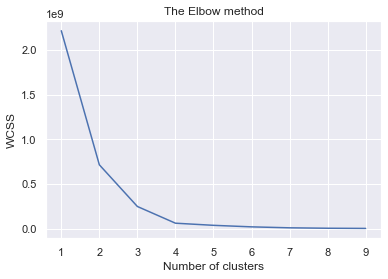

In [128]:
# Finding optimal number of clusters
# WCSS and Elbow method 
wcss=[]
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(features)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,10)
plt.plot(number_clusters,wcss)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [129]:
# Clustering 7 clusters and measuring time 
kmeans = KMeans(7)
kmeans.fit(features)


KMeans(n_clusters=7)

In [130]:
# Clustering outcomes for parts
outcome_clusters = kmeans.fit_predict(features)
outcome_clusters

array([5, 1, 6, 6, 6, 5, 4, 6, 6, 6, 5, 1, 6, 1, 6, 6, 5, 1, 6, 6, 6, 5,
       1, 3, 3, 0, 3, 3, 2, 2, 2, 3, 3, 0, 3, 3, 2, 2, 2, 3, 3, 0, 3, 3,
       2, 2, 2, 3, 3, 0, 3, 3, 2, 2, 2, 3, 3, 0, 3, 3, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 2, 6, 6, 6, 6, 6, 6, 6, 6, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2,
       2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 3, 0, 3, 3, 2, 2, 2, 3, 3, 0, 3, 3, 2, 2, 2, 3, 3, 0, 3, 3, 6,
       6, 6, 3, 3, 0, 3, 3, 2, 2, 2, 3, 3, 0, 3, 3, 2, 2, 2, 3, 3, 0, 3,
       3, 2, 2, 2, 3, 3, 0, 3, 3, 2, 2, 2], dtype=int32)

In [131]:
#Plotting clustering results
data_with_clusters = df.copy()
data_with_clusters['Clusters'] = outcome_clusters 

In [132]:
# Making new dataframe to visualise clustering results
df_7_clusters = (pd.DataFrame(data_with_clusters, columns = ['Clusters','class'])).sort_values(by=['Clusters'])

In [133]:
#Making a function to speed up the making and populating of the 'predicted class' column of dataframe
def predicted_class(x):
    x['predicted class'] = ""
    #loop through the clusters
    num_clusters = x['Clusters'].max() + 1
    for cluster in range(0, num_clusters):
 
                #Get the mode of the cluster
                this_cluster = x[x['Clusters'] == cluster]
                mode = this_cluster['class'].mode().iloc[0] #iloc[0] required because it's returning a series - not a single value
               
                #populate the new column
                x['predicted class'] = np.where(x['Clusters'] == cluster, mode, x['predicted class'])

In [134]:
# Making a function to plot confusion matrices
def confusionmatrix(x):
    cf= confusion_matrix(x['class'], x['predicted class'], normalize = 'pred', labels = x['class'].unique())
    cmd = ConfusionMatrixDisplay(cf, display_labels=x['class'].unique())
    fig, ax = plt.subplots(figsize=(13, 13))
    cmd.plot(cmap='Greys', xticks_rotation='horizontal', values_format=None, ax=ax)
    plt.tick_params(axis=u'both', which=u'both',length=0)
    plt.grid(b=None)

In [135]:
# Making a function to calculate accuracy score
def accuracyscore(x):
    a=(accuracy_score(x['class'],x['predicted class'], normalize = True))
    accuracy = "{:.2%}".format(a)
    print(accuracy)

In [136]:
# Making and populating 'predicted class' column of dataframe
predicted_class(df_7_clusters)

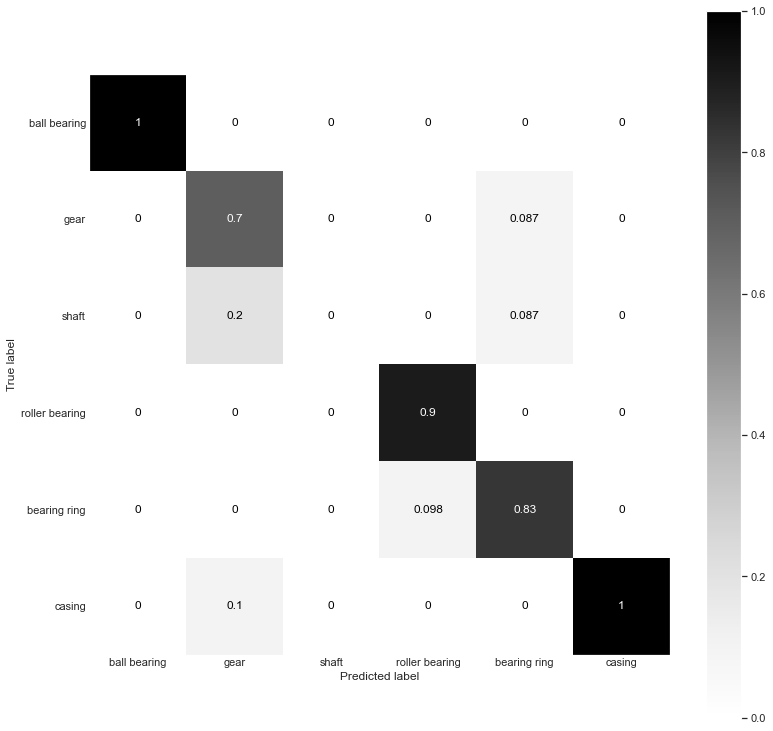

In [137]:
# Plot confusion matrix
confusionmatrix(df_7_clusters)

In [138]:
#Calculate accuracy score
accuracyscore(df_7_clusters)

92.02%


In [139]:
# Testing model with 6 clusters
#Clustering
kmeans = KMeans(6)
kmeans.fit(features)
#Clustering outcomes
outcome_clusters = kmeans.fit_predict(features)
#Plotting clustering outcomes
data_with_clusters = df.copy()
data_with_clusters['Clusters'] = outcome_clusters 
df_6_clusters = (pd.DataFrame(data_with_clusters, columns = ['Clusters','class'])).sort_values(by=['Clusters'])

In [140]:
# Making and populating 'predicted class' column of dataframe
predicted_class(df_6_clusters)

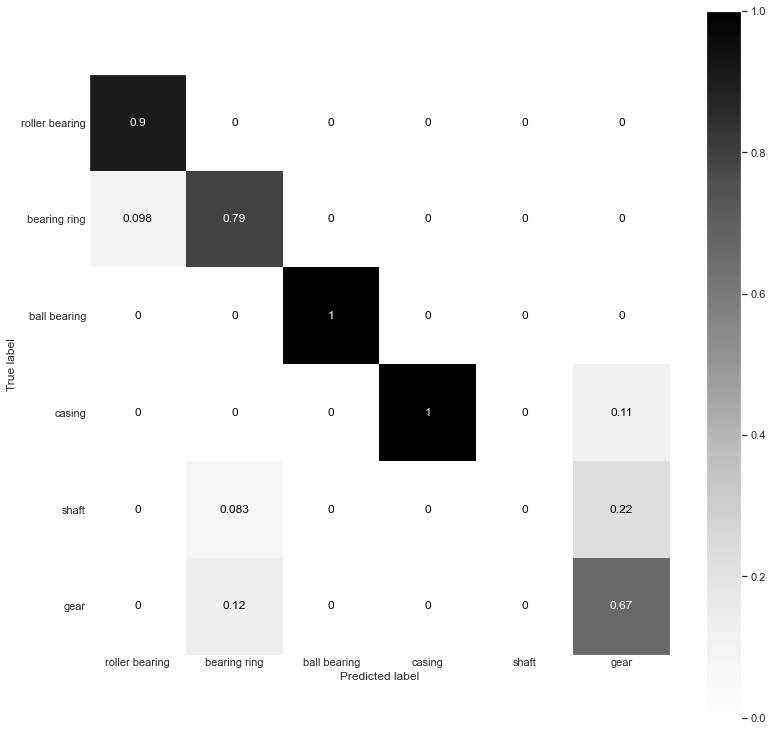

In [141]:
# Plot confusion matrix
confusionmatrix(df_6_clusters)

In [142]:
#Calculate accuracy score
accuracyscore(df_6_clusters)

91.49%


In [143]:
""" 
Now testing model without casing and bearing rings due to poor accuracy
From this point forth 
wcabr = without casing and bearing rings
"""

' \nNow testing model without casing and bearing rings due to poor accuracy\nFrom this point forth \nwcabr = without casing and bearing rings\n'

In [144]:
# Removing Casing and Bearing Rings

df1=df.copy()
casing = df1[df1['class'] == 'casing'].index
df1.drop(casing, inplace = True)

bearing_ring = df1[df1['class'] == 'bearing ring'].index
df1.drop(bearing_ring, inplace = True)

In [145]:
# Allowing alternating between datasets
# Dataset with all the variables (old and new variables) have many more columns

if len(df.columns)>35:
    parameters_wcabr = (df.columns.values[3:236])
else:
    parameters_wcabr = (df.columns.values[1:33])

In [146]:
# New variables
class_names_wcabr = df1['class'].unique()
class_wcabr = df1['class']
features_names_wcabr = parameters_wcabr
features_wcabr = df1[parameters_wcabr]

In [147]:
# Checking casing and bearing rings have been removed
print(class_names_wcabr)

['shaft' 'gear' 'ball bearing' 'roller bearing']


In [148]:
# Testing model with 5 clusters wcabr
#Clustering
kmeans = KMeans(5)
kmeans.fit(features_wcabr)
#Clustering outcomes
outcome_clusters = kmeans.fit_predict(features_wcabr)
#Plotting clustering outcomes
data_with_clusters = df1.copy()
data_with_clusters['Clusters'] = outcome_clusters 
df_5_clusters_wcabr = (pd.DataFrame(data_with_clusters, columns = ['Clusters','class'])).sort_values(by=['Clusters'])

In [149]:
# Making and populating 'predicted class' column of dataframe
predicted_class(df_5_clusters_wcabr)

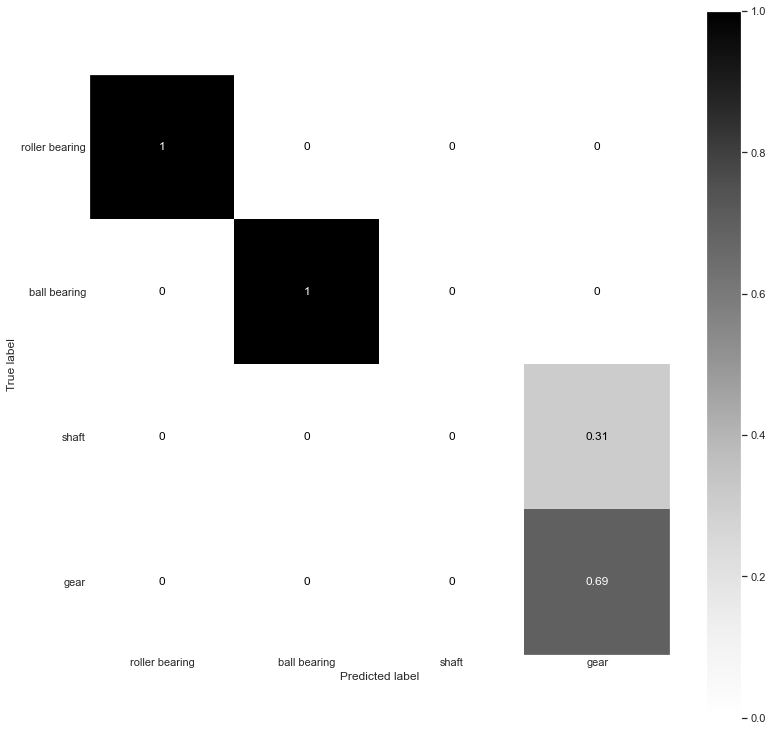

In [150]:
# Plot confusion matrix
confusionmatrix(df_5_clusters_wcabr)

In [151]:
#Calculate accuracy score
accuracyscore(df_5_clusters_wcabr)

97.48%


In [152]:
# Testing model with 4 clusters wcabr
#Clustering
kmeans = KMeans(4)
kmeans.fit(features_wcabr)
#Clustering outcomes
outcome_clusters = kmeans.fit_predict(features_wcabr)
#Plotting clustering outcomes
data_with_clusters = df1.copy()
data_with_clusters['Clusters'] = outcome_clusters 
df_4_clusters_wcabr = (pd.DataFrame(data_with_clusters, columns = ['Clusters','class'])).sort_values(by=['Clusters'])

In [153]:
# Making and populating 'predicted class' column of dataframe
predicted_class(df_4_clusters_wcabr)

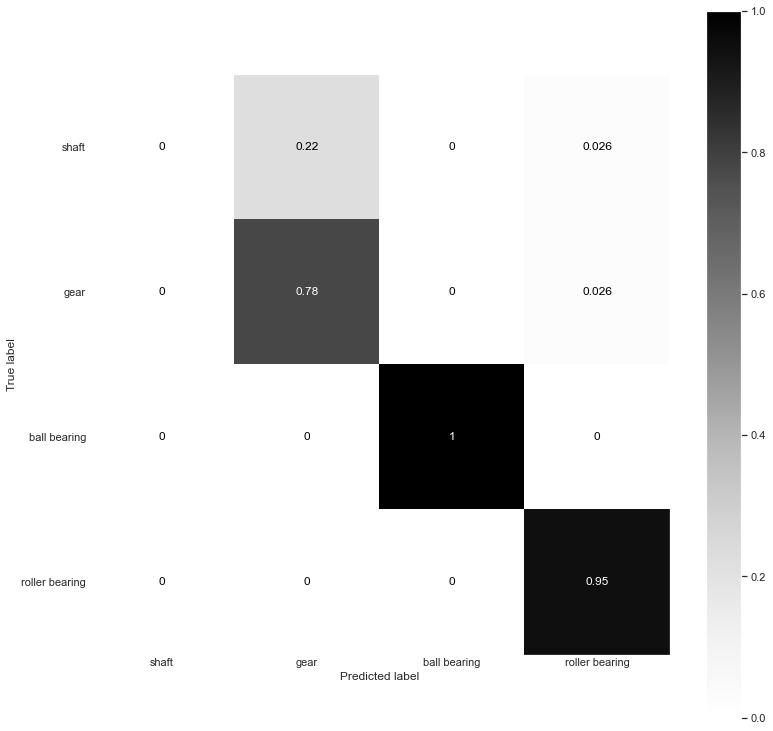

In [154]:
# Plot confusion matrix
confusionmatrix(df_4_clusters_wcabr)

In [155]:
#Calculate accuracy score
accuracyscore(df_4_clusters_wcabr)

96.23%


In [156]:
# Testing model with 2 clusters wcabr
#Clustering
kmeans = KMeans(2)
kmeans.fit(features_wcabr)
#Clustering outcomes
outcome_clusters = kmeans.fit_predict(features_wcabr)
#Plotting clustering outcomes
data_with_clusters = df1.copy()
data_with_clusters['Clusters'] = outcome_clusters 
df_2_clusters_wcabr = (pd.DataFrame(data_with_clusters, columns = ['Clusters','class'])).sort_values(by=['Clusters'])

In [157]:
# Allowing alternating between datasets
if dataset == path1:
    out = 'models/1_old_gearbox_Kmeans_cluster.xlsx'
elif dataset == path2:
    out = 'models/2_old_gearbox_Kmeans_cluster_all_variables.xlsx' 
elif dataset == path3:
    out = 'models/3_new_gearbox_Kmeans_cluster.xlsx'
elif dataset == path4:
    out = 'models/4_new_gearbox_Kmeans_cluster_all_variables.xlsx'
else:
    out = 'models/5_both_gearbox_Kmeans_cluster_all_variables.xlsx'    

In [158]:
with pd.ExcelWriter(out) as writer:  
    df_6_clusters.to_excel(writer, sheet_name='6 clusters', index = False)
    df_7_clusters.to_excel(writer, sheet_name='7 clusters', index = False)
    df_2_clusters_wcabr.to_excel(writer, sheet_name='2 clusters WCABR', index = False)
    df_4_clusters_wcabr.to_excel(writer, sheet_name='4 clusters WCABR', index = False)
    df_5_clusters_wcabr.to_excel(writer, sheet_name='5 clusters WCABR', index = False)

IndentationError: unexpected indent (<ipython-input-158-d211fa619b4f>, line 2)